In [1]:
import oracles
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from inspect import getfullargspec
from itertools import product
from optimization import *
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt
from utils import *
from sklearn.datasets import load_svmlight_file

In [2]:
traces = []
A, b = load_svmlight_file('gisette')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
for n in [1, 5, 10, 25, 50, 75, 100]:
    regcoef = 1.0 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, regcoef)
    _, _, trace = lbfgs(oracle, np.zeros(A.shape[1]), memory_size=n, trace=True)
    traces.append(trace)


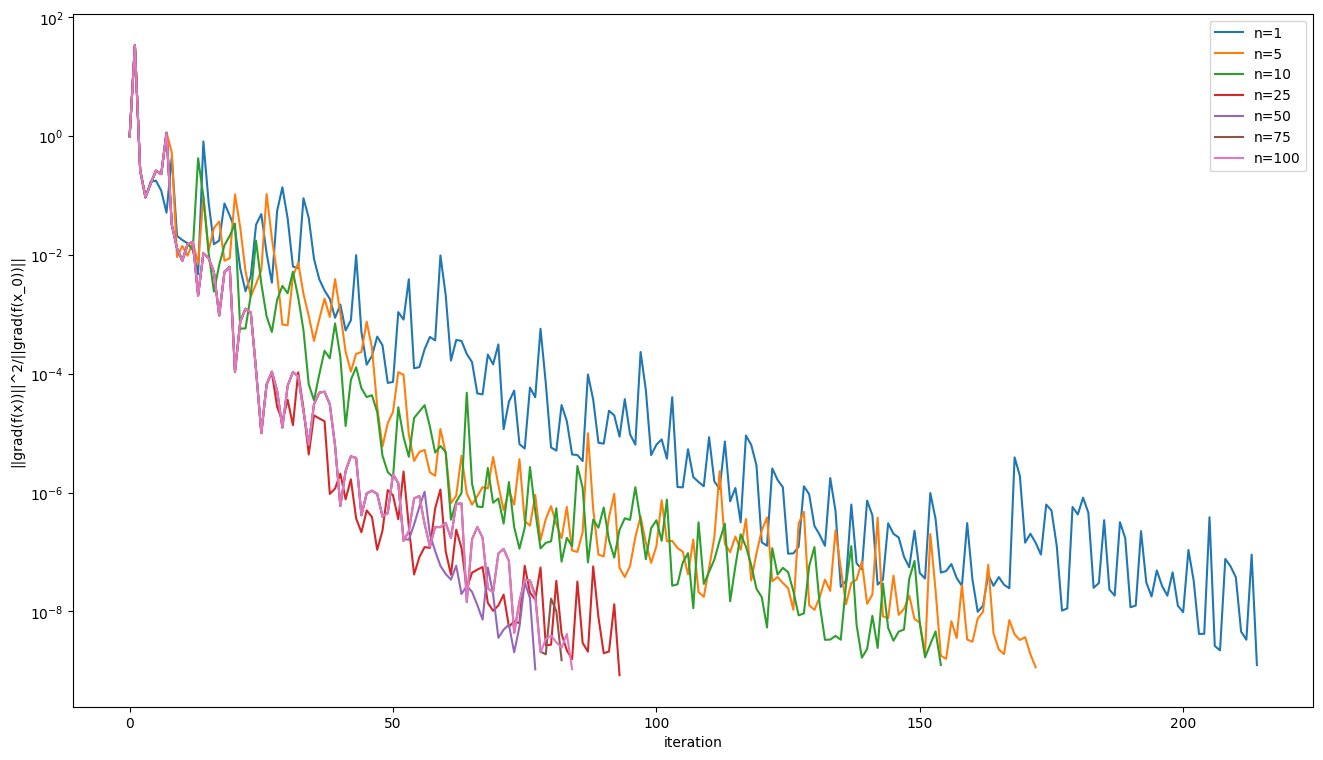

In [3]:
plt.figure(figsize=(16, 9))

for trace, n  in zip(traces, [1, 5, 10, 25, 50, 75, 100]):
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=f"n={n}")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.xlabel("iteration")
    plt.legend()
    plt.yscale('log')
plt.show()

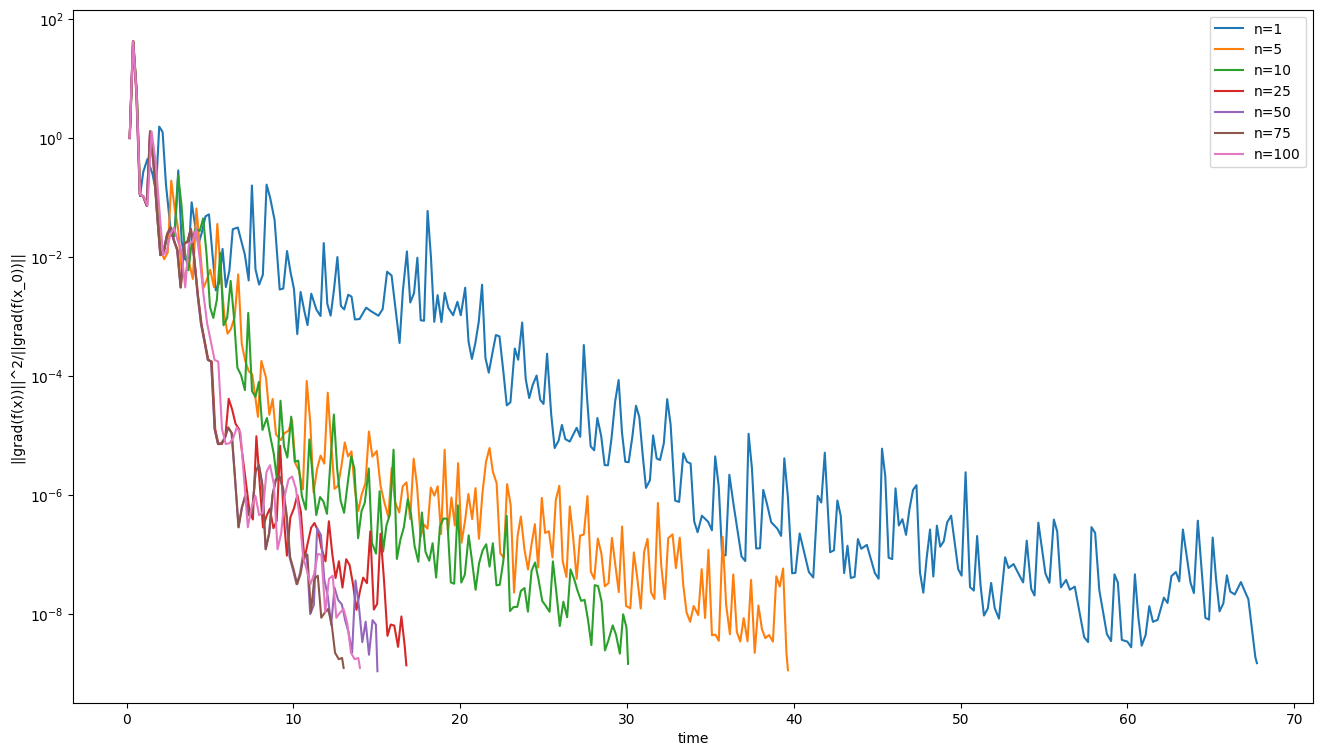

In [15]:
plt.figure(figsize=(16, 9))

for trace, n  in zip(traces, [1, 5, 10, 25, 50, 75, 100]):
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=f"n={n}")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.xlabel("time")
    plt.legend()
    plt.yscale('log')
plt.show()